<a href="https://colab.research.google.com/github/RupeshSharma14/Insurance-Cost-Prediction/blob/main/Insurance_Cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the Data

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from google.colab import drive

In [2]:
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (7, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid');

**Load Dataset**

In [3]:
# Mounting the google drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Loading the dataset 

path = "/content/drive/MyDrive/Insurance Cost Prediction/insurance.csv"
insurance = pd.read_csv(path)

In [5]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Summarize the Dataset

**Dimensions of Dataset**

In [6]:
insurance.shape

(1338, 7)

**Data Type of attributes**

In [7]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

**Statistical Summary of Numerical Attributes**

In [8]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


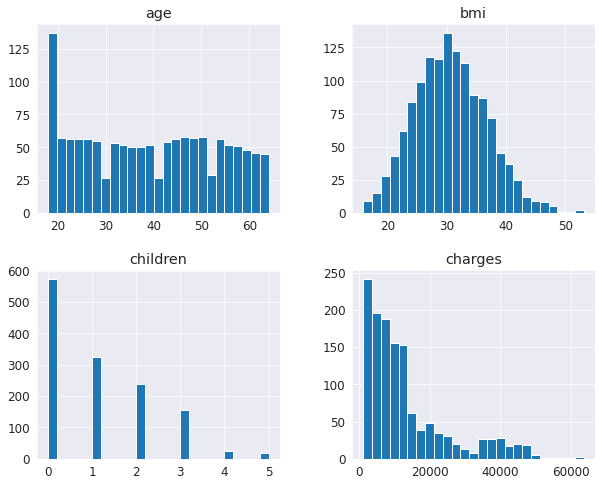

In [9]:
insurance.hist(bins = 25, figsize=(10,8));

Few points to remember from the histogram:
- Most of the clients are of the age 20.
- Most of the clients have BMI of 30.
- Most of the clients doesn't have any child.

**Distribution of Categorical Attributes**

- Sex

In [10]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

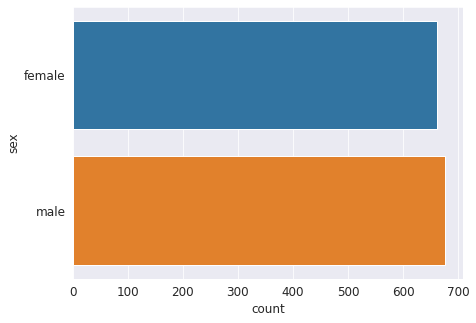

In [11]:
sns.countplot(y = 'sex', data = insurance);

Proportion of male and female is almost equal.

- Smoker

In [12]:
insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

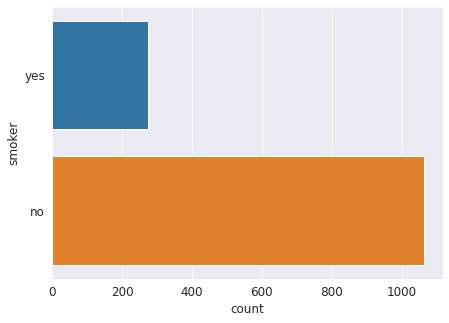

In [13]:
sns.countplot(y = 'smoker', data = insurance);

Non-smoking clients are more as compared to the smoking ones.

- Region

In [14]:
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

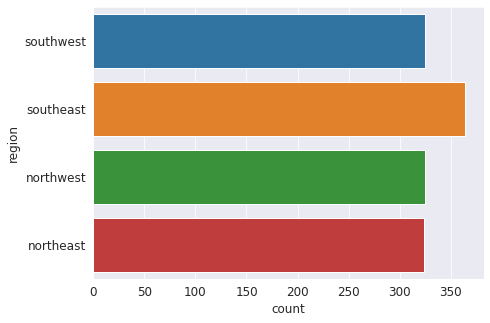

In [15]:
sns.countplot(y = 'region', data = insurance);

Southeast region have more number of clients as compared to the others.

## Create a Test Set

- **Random Sampling**

In [16]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(insurance, test_size = 0.2, random_state =42)

- **Stratified Sampling**

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

splits = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in splits.split(insurance, insurance['smoker']):
    strat_train_set = insurance.loc[train_index]
    strat_test_set = insurance.loc[test_index]

**Compare Random and Stratified Sampling results**

In [18]:
def smoker_cat_proprotions(data):
    return data['smoker'].value_counts() / len(data)

compare_props = pd.DataFrame({
    'Overall': smoker_cat_proprotions(insurance),
    'Random': smoker_cat_proprotions(test_set),
    'Stratified': smoker_cat_proprotions(strat_test_set)
}).sort_index()
compare_props['Random % Error'] = 100 * compare_props['Random'] / compare_props['Overall'] - 100
compare_props['Stratified % Error'] = 100 * compare_props['Stratified'] / compare_props['Overall'] - 100

In [19]:
compare_props

,Overall,Random,Stratified,Random % Error,Stratified % Error
no,0.795217,0.798507,0.794776,0.413814,-0.055409
yes,0.204783,0.201493,0.205224,-1.606929,0.215165


As, we can see Stratified Sampling samples the dataset into train set and test set much better than the Random Sampling.Therefore, we will use the train set and test set of Stratified Sampling.

**Discover and visualize data to gain insights**

In [20]:
insurance = strat_train_set.copy()

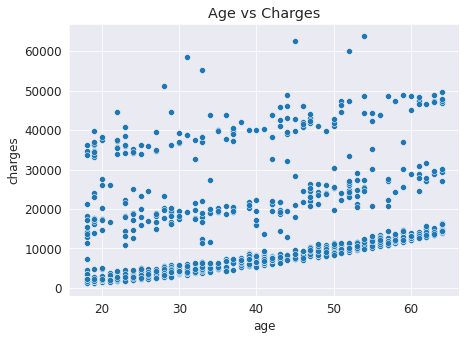

In [21]:
plt.title('Age vs Charges')
sns.scatterplot(x = 'age', y = 'charges', data = insurance);

We can notice that older persons tends to pay slightly more premium charges.

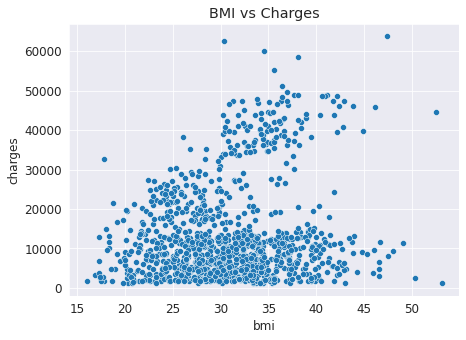

In [22]:
plt.title('BMI vs Charges')
sns.scatterplot(x = 'bmi', y = 'charges', data = insurance);

When bmi is 30 or more, there is a high probablity of charging more premium.

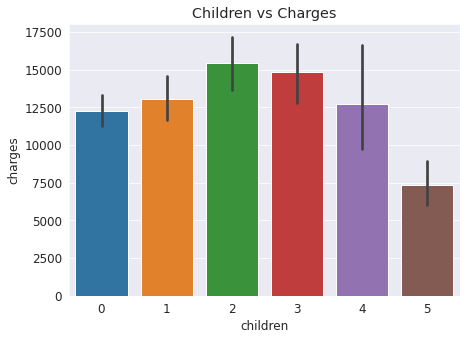

In [23]:
plt.title('Children vs Charges')
sns.barplot(x = 'children', y = 'charges', data = insurance);

We can say that person having 2 or 3 children tend to pay more. But surprisingly, person having 5 children pays the least insurance charges. 

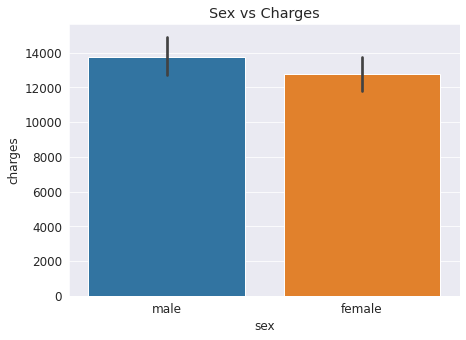

In [24]:
plt.title('Sex vs Charges')
sns.barplot(x = 'sex', y = 'charges', data = insurance);

There is very less difference between the average cost paid by male and female.

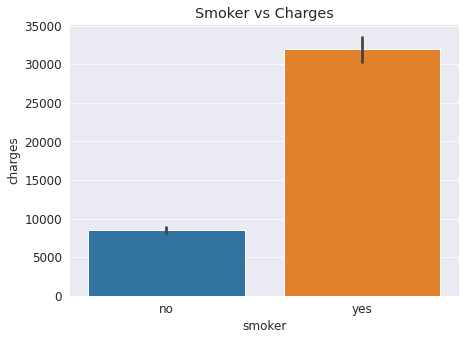

In [25]:
plt.title('Smoker vs Charges')
sns.barplot(x = 'smoker', y = 'charges', data = insurance);

We can notice that smokers are charged more as compared to non-smokers.  

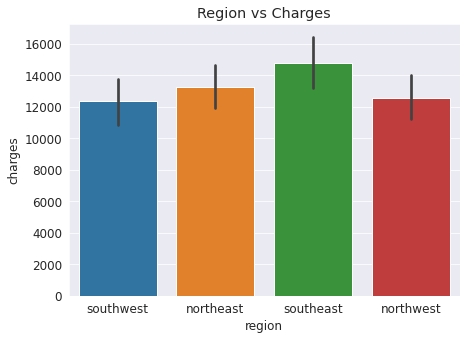

In [26]:
plt.title('Region vs Charges')
sns.barplot(x = 'region', y = 'charges', data = insurance);

It can be seen that persons of southeast and notheast region pays more premium charges.

**Prepare the data for Machine Leaning Algorithm**

In [27]:
insurance_label = strat_train_set['charges'].copy()
insurance = strat_train_set.drop('charges', axis = 1)

Lets preprocess Categorical input features

In [28]:
insurance_category = insurance[['sex', 'smoker', 'region']]
insurance_category.head(10)

,sex,smoker,region
294,male,no,southwest
179,female,no,northeast
1335,female,no,southeast
634,male,no,southwest
67,male,no,northwest
1239,female,no,southeast
979,female,no,southeast
1231,female,yes,southwest
942,female,no,northeast
80,male,no,northeast


In [29]:
insurance_num = insurance.drop(['sex', 'smoker', 'region'], axis=1)

In [30]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
insurance_category_onehot = cat_encoder.fit_transform(insurance_category)
insurance_category_onehot

<1070x8 sparse matrix of type '<class 'numpy.float64'>'
	with 3210 stored elements in Compressed Sparse Row format>

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_attribs = list(insurance_num)
cat_attribs = ['sex', 'smoker', 'region']

pipeline = ColumnTransformer([
    ('std_scaler', StandardScaler(), num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

insurance_prepared = pipeline.fit_transform(insurance)

In [32]:
insurance_prepared

array([[-1.00715695, -0.656649  ,  1.56520739, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.1331464 ,  0.3949374 ,  1.56520739, ...,  0.        ,
         0.        ,  0.        ],
       [-1.50603966,  1.00636332, -0.91471153, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.50827423,  1.08661814, -0.08807189, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.41822224, -0.35879605,  0.73856775, ...,  0.        ,
         1.        ,  0.        ],
       [-1.36350174,  0.19057718, -0.91471153, ...,  1.        ,
         0.        ,  0.        ]])

In [33]:
insurance_prepared.shape

(1070, 11)

**Select and Train a Model**

- Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(insurance_prepared, insurance_label)

LinearRegression()

In [35]:
from sklearn.metrics import r2_score

insurance_prediction = lin_reg.predict(insurance_prepared)
lin_score= r2_score(insurance_label, insurance_prediction)
lin_score

0.7410536550600866

- Decision Tree Regressor

In [36]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(insurance_prepared, insurance_label)

DecisionTreeRegressor()

In [37]:
insurance_prediction = tree_reg.predict(insurance_prepared)
tree_score = r2_score(insurance_label, insurance_prediction)
tree_score

0.9983304842945838

- Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(insurance_prepared, insurance_label)

RandomForestRegressor(n_estimators=10, random_state=42)

In [39]:
insurance_prediction = forest_reg.predict(insurance_prepared)
forest_score = r2_score(insurance_label, insurance_prediction)
forest_score

0.9686276714119904

**Fine tune the model**

Appling cross validation to confirm the best model from the above model.

In [40]:
def display_score(score):
    print('Scores:', score)
    print('Mean:', score.mean())
    print('Std Deviation', score.std())

In [41]:
from sklearn.model_selection import cross_val_score

lin_score = cross_val_score(lin_reg, insurance_prepared, insurance_label,
                           scoring='r2', cv = 10)

display_score(lin_score)

Scores: [0.75567427 0.70575403 0.69700151 0.81019585 0.64843481 0.66160486
 0.78927775 0.82657099 0.69264317 0.6668971 ]
Mean: 0.7254054346124376
Std Deviation 0.06172868131423804


In [42]:
tree_score = cross_val_score(tree_reg, insurance_prepared, insurance_label,
                           scoring='r2', cv = 10)
display_score(tree_score)

Scores: [0.75790146 0.72134614 0.62999536 0.70014878 0.62573489 0.53250327
 0.80259455 0.80271799 0.63871642 0.58630046]
Mean: 0.6797959325284453
Std Deviation 0.08715343809099584


In [43]:
forest_score = cross_val_score(forest_reg, insurance_prepared, insurance_label,
                           scoring='r2', cv = 10)
display_score(forest_score)

Scores: [0.86474923 0.81549146 0.77357126 0.88076295 0.74992051 0.74768306
 0.88287595 0.89849604 0.81014135 0.74813845]
Mean: 0.8171830258772068
Std Deviation 0.05771342480833849


As we can see Random Forest Regressor is the best model, but it seems to be overfitted. So, lets tune its hyperparameter to improve our model.

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='r2', random_state=42)
rnd_search.fit(insurance_prepared, insurance_label)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8d9d25bc90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8d9d25bd50>},
                   random_state=42, scoring='r2')

In [45]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=5, random_state=42)

In [46]:
final_model = rnd_search.best_estimator_

y_test = strat_test_set['charges'].copy()
X_test = strat_test_set.drop('charges', axis = 1)

X_test_prepared = pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_score = r2_score(y_test, final_predictions)

In [47]:
final_score

0.8566312650993848

In [48]:
from sklearn.pipeline import Pipeline
full_pipeline_with_predictor = Pipeline([
    ('preparation', pipeline),
    ('final_model', final_model)
])
full_pipeline_with_predictor.fit(insurance, insurance_label)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('std_scaler',
                                                  StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('final_model',
                 RandomForestRegressor(max_features=5, random_state=42))])

In [49]:
model = full_pipeline_with_predictor

In [50]:
import joblib

joblib.dump(model, 'model.pkl')

['model.pkl']